# K-Means Clustering from Scratch

## Objective
This notebook demonstrates the implementation of the K-Means clustering algorithm from scratch using Python. We will apply it to the **Iris Dataset** and evaluate clustering quality using metrics like Silhouette Score, Davies-Bouldin Index, and Within-Cluster Sum of Squares (WCSS).

---

## Steps:
1. Data Exploration and Preprocessing.
2. Implementation of K-Means Clustering from Scratch.
3. Evaluation of Clustering Quality.
4. Visualization of Results.

# Import Libraries and Load Dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


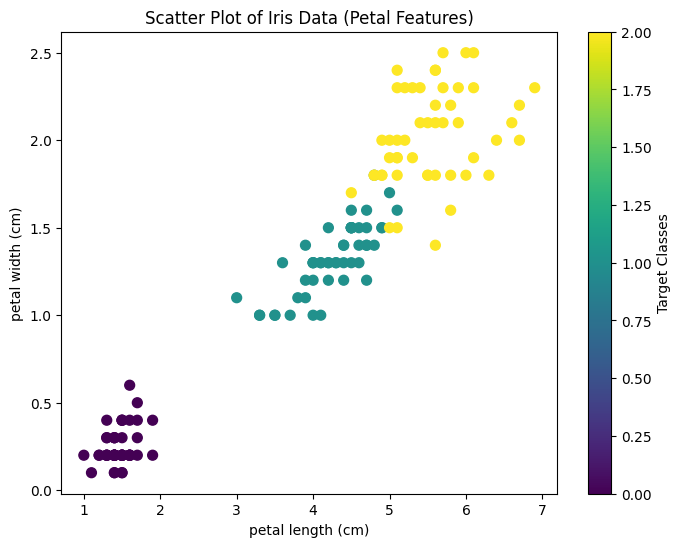

In [ ]:
# Scatter plot with the best pair of features
plt.figure(figsize=(8, 6))

# Define the features for the plot
feature_x = 'petal length (cm)'  # Best feature for x-axis
feature_y = 'petal width (cm)'   # Best feature for y-axis

# Plot each row of the data
plt.scatter(iris_df[feature_x], iris_df[feature_y], c=iris_df['target'], cmap='viridis', s=50)

# Label the axes
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Iris Data (Petal Features)")
plt.colorbar(label="Target Classes")
plt.show()

# Data Preprocessing

In [ ]:
# Normalize the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(iris_df.iloc[:, :-1])  # Exclude the target column

# Convert to NumPy array for easier computation in K-Means
data = np.array(features)

print("Data normalized and ready for clustering.")

Data normalized and ready for clustering.


# K-Means Clustering

In [ ]:
# K-Means Implementation from Scratch
class KMeansScratch:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def initialize_centroids(self, data):
        # Randomly select initial centroids
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.permutation(data.shape[0])
        return data[random_indices[:self.n_clusters]]

    def compute_distances(self, data, centroids):
        # Compute the Euclidean distance from each point to each centroid
        return np.array([[np.linalg.norm(point - centroid) for centroid in centroids] for point in data])

    def assign_clusters(self, distances):
        # Assign each point to the nearest cluster
        return np.argmin(distances, axis=1)

    def update_centroids(self, data, labels):
        # Recalculate centroids as the mean of all points in a cluster
        return np.array([data[labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def fit(self, data):
        # Fit the K-Means algorithm
        self.centroids = self.initialize_centroids(data)

        for _ in range(self.max_iter):
            distances = self.compute_distances(data, self.centroids)
            labels = self.assign_clusters(distances)
            new_centroids = self.update_centroids(data, labels)

            if np.all(new_centroids == self.centroids):  # Convergence check
                break
            self.centroids = new_centroids

        self.labels_ = labels



In [ ]:
# Apply K-Means to Iris Data
kmeans = KMeansScratch(n_clusters=3)
kmeans.fit(data)

In [ ]:
# Assign clusters
iris_df['cluster'] = kmeans.labels_
print("Clustering complete.")

Clustering complete.


# Clustering Quality

In [ ]:
# Compute metrics like Silhouette Score, Davies-Bouldin Index, and WCSS
#Clustering Quality Metrics
silhouette_avg = silhouette_score(data, kmeans.labels_)
davies_bouldin = davies_bouldin_score(data, kmeans.labels_)
wcss = sum(np.min(kmeans.compute_distances(data, kmeans.centroids), axis=1))

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.83
Within-Cluster Sum of Squares (WCSS): 129.31


# Visualization

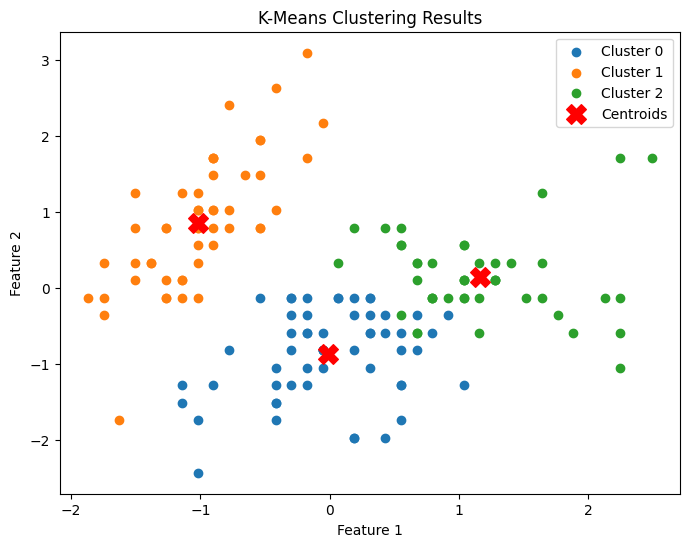

In [ ]:
# Visualize Clusters in 2D (using first two features for simplicity)
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    plt.scatter(data[kmeans.labels_ == cluster, 0], data[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

# Elbow Plot

In [ ]:
# Elbow plot to determine the optimal number of clusters (k)
class KMeansScratch:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def initialize_centroids(self, data):
        np.random.seed(42)
        random_indices = np.random.permutation(data.shape[0])
        return data[random_indices[:self.n_clusters]]

    def compute_distances(self, data, centroids):
        return np.array([[np.linalg.norm(point - centroid) for centroid in centroids] for point in data])

    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    def update_centroids(self, data, labels):
        return np.array([data[labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def fit(self, data):
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iter):
            distances = self.compute_distances(data, self.centroids)
            labels = self.assign_clusters(distances)
            new_centroids = self.update_centroids(data, labels)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        self.labels_ = labels



In [ ]:
# Function to calculate WCSS for different values of k
def calculate_wcss(data):
    wcss = []
    for k in range(1, 11):  # Range of k values (1 to 10)
        kmeans = KMeansScratch(n_clusters=k)
        kmeans.fit(data)
        # Calculate WCSS (sum of squared distances to the nearest centroid)
        wcss_k = sum(np.min(kmeans.compute_distances(data, kmeans.centroids), axis=1))
        wcss.append(wcss_k)
    return wcss

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(data)



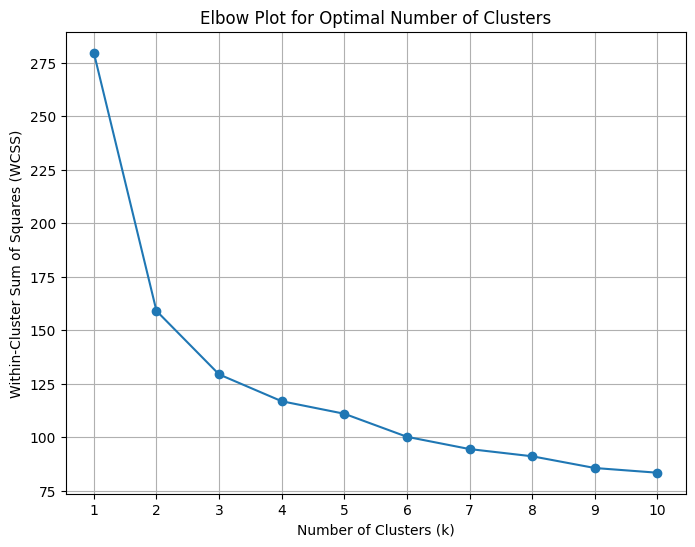

In [ ]:
# Plot the Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_values, marker='o')
plt.title("Elbow Plot for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

## Conclusion
The K-Means clustering algorithm was implemented from scratch and applied to the Iris Dataset. The clusters were evaluated using metrics like Silhouette Score, Davies-Bouldin Index, and Within-Cluster Sum of Squares (WCSS).

### Insights:
- Silhouette Score indicates the separation between clusters.
- Davies-Bouldin Index measures the compactness and separation of clusters.
- The Elbow Method can help determine the optimal number of clusters.
